In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from scipy.stats import mannwhitneyu 
import matplotlib.colors as mcolors
import scipy.stats as stats
import pandas as pd
import math
import seaborn as sns

# CSS Color Schemes

In [2]:
print(mcolors.CSS4_COLORS)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

# XKCD Colors

In [3]:
print(mcolors.XKCD_COLORS)

{'xkcd:cloudy blue': '#acc2d9', 'xkcd:dark pastel green': '#56ae57', 'xkcd:dust': '#b2996e', 'xkcd:electric lime': '#a8ff04', 'xkcd:fresh green': '#69d84f', 'xkcd:light eggplant': '#894585', 'xkcd:nasty green': '#70b23f', 'xkcd:really light blue': '#d4ffff', 'xkcd:tea': '#65ab7c', 'xkcd:warm purple': '#952e8f', 'xkcd:yellowish tan': '#fcfc81', 'xkcd:cement': '#a5a391', 'xkcd:dark grass green': '#388004', 'xkcd:dusty teal': '#4c9085', 'xkcd:grey teal': '#5e9b8a', 'xkcd:macaroni and cheese': '#efb435', 'xkcd:pinkish tan': '#d99b82', 'xkcd:spruce': '#0a5f38', 'xkcd:strong blue': '#0c06f7', 'xkcd:toxic green': '#61de2a', 'xkcd:windows blue': '#3778bf', 'xkcd:blue blue': '#2242c7', 'xkcd:blue with a hint of purple': '#533cc6', 'xkcd:booger': '#9bb53c', 'xkcd:bright sea green': '#05ffa6', 'xkcd:dark green blue': '#1f6357', 'xkcd:deep turquoise': '#017374', 'xkcd:green teal': '#0cb577', 'xkcd:strong pink': '#ff0789', 'xkcd:bland': '#afa88b', 'xkcd:deep aqua': '#08787f', 'xkcd:lavender pink': 

# Tableau Colors

In [4]:
print(mcolors.TABLEAU_COLORS)

{'tab:blue': '#1f77b4', 'tab:orange': '#ff7f0e', 'tab:green': '#2ca02c', 'tab:red': '#d62728', 'tab:purple': '#9467bd', 'tab:brown': '#8c564b', 'tab:pink': '#e377c2', 'tab:gray': '#7f7f7f', 'tab:olive': '#bcbd22', 'tab:cyan': '#17becf'}


# 1) PSNR withot attack

In [5]:
fnames=os.listdir('./CoverImages/')

In [6]:
fnames=list(map(lambda x:x.split('.')[0],fnames))

In [7]:
print(fnames)

['airplane', 'baboon', 'Barbara', 'elaine', 'fishingboat', 'Goldhill', 'house', 'lena', 'peeper', 'sailboat', 'splash', 'tank']


In [8]:
wa_haar=[65.2,65.12,65.24,65.13,65.18,65.17,65.13,65.18,65.12,65.11,65.3,65.07]
wa_13_7=[61.24,53.37,61.18,61.17,53.39,61.15,61.2,61.25,61.17,61.09,61.35,61.16]
wa_9_7=[61.72,52.43,61.58,61.47,61.53,61.55,61.71,61.61,61.49,61.44,61.78,61.55]
wa_6_2=[61.81,61.45,61.56,61.43,61.4,61.38,61.64,61.53,61.44,61.45,61.71,61.65]
wa_5_3=[61.74,46.27,61.63,61.47,61.5,61.6,61.68,61.67,61.57,61.56,61.73,61.68]
wa_3_1=[65.31,65.01,65.1,65.08,65.09,64.98,65.18,65.18,65.07,65.03,65.22,65.11]
wa_2_4=[61.3,47.02,61.1,60.92,53.36,61.12,61.13,61.09,61.0,61.01,61.26,60.98]
wa_2_10=[65.31,64.96,65.09,65.09,65.12,65.05,65.14,65.04,65.0,65.1,65.18,65.05]

In [9]:
methodname=['Haar','13_7','9_7','6_2','5_3','3_1','2_4','2_10']

In [10]:
data_to_plot=[wa_haar,wa_13_7,wa_9_7,wa_6_2,wa_5_3,wa_3_1,wa_2_4,wa_2_10]

# a) All PSNR graph without attack

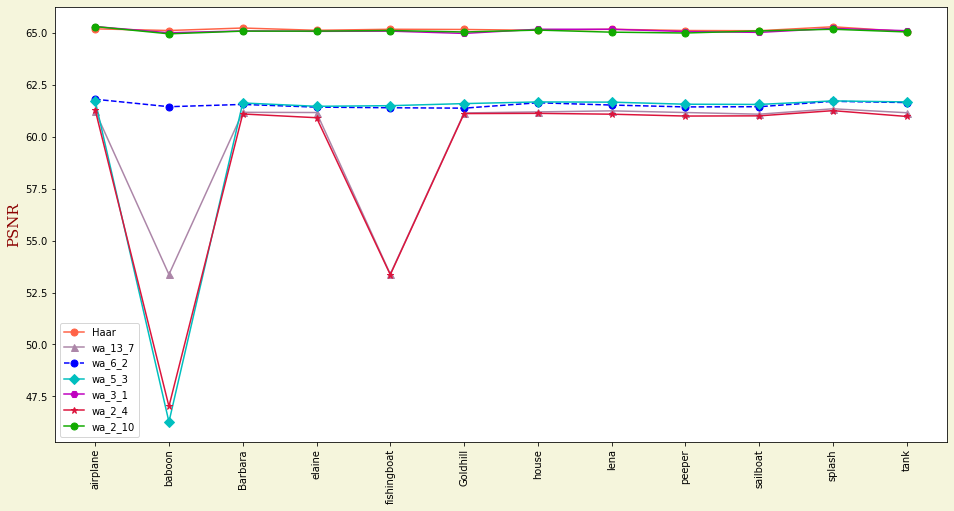

In [11]:
fig=plt.figure(figsize=(16,8),facecolor='beige',edgecolor='black')
#plt.style.use("ggplot")
plt.plot(fnames,wa_haar,'tomato',marker='o',ms=7,label='Haar')
plt.plot(fnames,wa_13_7,color='#ac86a8',marker='^',ms=7,label='wa_13_7')
plt.plot(fnames,wa_6_2,'b--',marker='o',ms=7,label='wa_6_2')
plt.plot(fnames,wa_5_3,'c',marker='D',ms=7,label='wa_5_3')
plt.plot(fnames,wa_3_1,'m',marker='H',ms=7,label='wa_3_1')
plt.plot(fnames,wa_2_4,color='#DC143C',marker='*',ms=7,label='wa_2_4')
plt.plot(fnames,wa_2_10,color="#11aa00",marker='o',ms=7,label='wa_2_10')
font2 = {'family':'serif','color':'darkred','size':15}
plt.xticks(fnames, rotation ='vertical',fontfamily='Verdana')
plt.ylabel('PSNR',fontdict=font2)
plt.legend()
plt.show()

# b) Normality Test of Data with Q-Q Plot

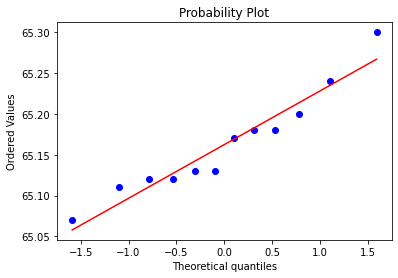

In [12]:
stats.probplot(wa_haar, dist="norm", plot=plt)
plt.show()

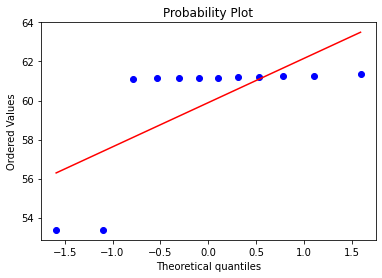

In [13]:
stats.probplot(wa_13_7, dist="norm", plot=plt)
plt.show()

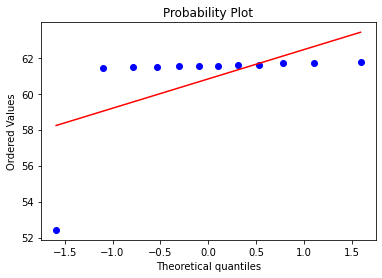

In [14]:
stats.probplot(wa_9_7, dist="norm", plot=plt)
plt.show()

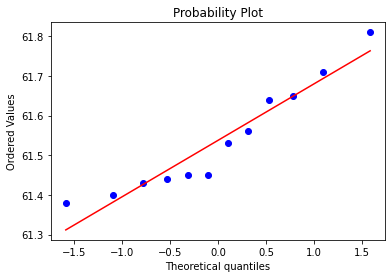

In [15]:
stats.probplot(wa_6_2, dist="norm", plot=plt)
plt.show()

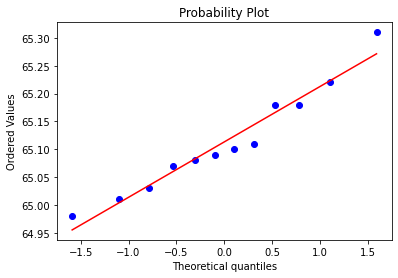

In [16]:
stats.probplot(wa_3_1, dist="norm", plot=plt)
plt.show()

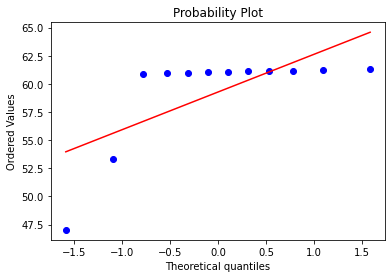

In [17]:
stats.probplot(wa_2_4, dist="norm", plot=plt)
plt.show()

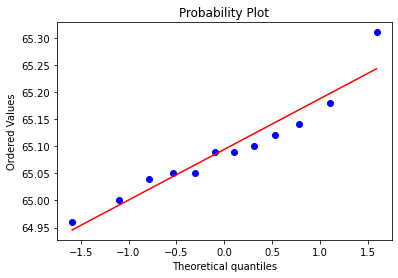

In [18]:
stats.probplot(wa_2_10, dist="norm", plot=plt)
plt.show()

# c) Normality Test of Data with Shapiro wilks test

In [19]:
shapiro_test = stats.shapiro(wa_haar)
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Shapiro-Wilk Test: W=0.9385744333267212, p-value=0.47982800006866455


In [20]:
shapiro_test = stats.shapiro(wa_13_7)
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Shapiro-Wilk Test: W=0.4848400950431824, p-value=1.368896209896775e-05


In [21]:
shapiro_test = stats.shapiro(wa_9_7)
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Shapiro-Wilk Test: W=0.36391836404800415, p-value=2.0615777884813724e-06


In [22]:
shapiro_test = stats.shapiro(wa_6_2)
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Shapiro-Wilk Test: W=0.9082430005073547, p-value=0.20255470275878906


In [23]:
shapiro_test = stats.shapiro(wa_3_1)
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Shapiro-Wilk Test: W=0.9562274813652039, p-value=0.7289324998855591


In [24]:
shapiro_test = stats.shapiro(wa_2_4)
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Shapiro-Wilk Test: W=0.5077667236328125, p-value=2.0168134142295457e-05


In [25]:
shapiro_test = stats.shapiro(wa_2_10)
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Shapiro-Wilk Test: W=0.9336155652999878, p-value=0.42001479864120483


# d) Skewness and Kutosis test of data

In [26]:
# Skewness and Kurtosis
skewness = stats.skew(wa_haar)
kurtosis = stats.kurtosis(wa_haar)
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Skewness: 0.7390019156102078, Kurtosis: 0.004347460159809913


In [27]:
# Skewness and Kurtosis
skewness = stats.skew(wa_13_7)
kurtosis = stats.kurtosis(wa_13_7)
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Skewness: -1.7870822559747876, Kurtosis: 1.1968895006196005


In [28]:
# Skewness and Kurtosis
skewness = stats.skew(wa_9_7)
kurtosis = stats.kurtosis(wa_9_7)
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Skewness: -3.006530888695211, Kurtosis: 7.060027983903591


In [29]:
# Skewness and Kurtosis
skewness = stats.skew(wa_6_2)
kurtosis = stats.kurtosis(wa_6_2)
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Skewness: 0.6531600452037023, Kurtosis: -0.7817177992251239


In [30]:
# Skewness and Kurtosis
skewness = stats.skew(wa_3_1)
kurtosis = stats.kurtosis(wa_3_1)
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Skewness: 0.5895922560090326, Kurtosis: -0.3193806753822708


In [31]:
# Skewness and Kurtosis
skewness = stats.skew(wa_2_4)
kurtosis = stats.kurtosis(wa_2_4)
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Skewness: -2.133592296668438, Kurtosis: 3.0153469359231835


In [32]:
# Skewness and Kurtosis
skewness = stats.skew(wa_2_10)
kurtosis = stats.kurtosis(wa_2_10)
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Skewness: 0.9186581846288134, Kurtosis: 0.8805723535692045


# t-Test

In [33]:
s1=np.std(wa_haar)
s2=np.std(wa_13_7)
print(s1,s2)

0.06057020719792878 2.913495418832087


In [34]:
# Perform independent two-sample t-test
t_stat, p_value = stats.ttest_ind(wa_haar,wa_13_7)

# Print results
print(f"Independent Two-Sample t-test: t_stat={t_stat}, p-value={p_value}")

Independent Two-Sample t-test: t_stat=5.996945569366721, p-value=4.90810356759703e-06


# e) Mann Whitney U test

Non-parametric tests (sometimes referred to as ‘distribution-free tests’) are used when you assume the data in your populations of interest do not have a Normal distribution. You can think of the Mann Whitney U-test as analogous to the unpaired Student’s t-test, 

In [35]:
dataset=np.array(data_to_plot)

In [36]:
data=np.transpose(dataset)

In [37]:
print(data)

[[65.2  61.24 61.72 61.81 61.74 65.31 61.3  65.31]
 [65.12 53.37 52.43 61.45 46.27 65.01 47.02 64.96]
 [65.24 61.18 61.58 61.56 61.63 65.1  61.1  65.09]
 [65.13 61.17 61.47 61.43 61.47 65.08 60.92 65.09]
 [65.18 53.39 61.53 61.4  61.5  65.09 53.36 65.12]
 [65.17 61.15 61.55 61.38 61.6  64.98 61.12 65.05]
 [65.13 61.2  61.71 61.64 61.68 65.18 61.13 65.14]
 [65.18 61.25 61.61 61.53 61.67 65.18 61.09 65.04]
 [65.12 61.17 61.49 61.44 61.57 65.07 61.   65.  ]
 [65.11 61.09 61.44 61.45 61.56 65.03 61.01 65.1 ]
 [65.3  61.35 61.78 61.71 61.73 65.22 61.26 65.18]
 [65.07 61.16 61.55 61.65 61.68 65.11 60.98 65.05]]


In [38]:
df=pd.DataFrame(data,columns=methodname)

In [39]:
# perform mann whitney test for every pair of methods
pvalues=np.zeros((8,8),dtype='float32')
decision=np.zeros((8,8),dtype='bool')
alpha = 0.05
for i in range(8):
    for j in range(8):
        stat, p_value = mannwhitneyu(df.values[:,i],df.values[:,j],alternative='two-sided') 
        pvalues[i,j]=round(p_value,3)
        if p_value < alpha:
            decision[i,j]=False
        else:
            decision[i,j]=True    
        

In [40]:
print(pvalues)

[[1.    0.    0.    0.    0.    0.099 0.    0.022]
 [0.    1.    0.001 0.    0.001 0.    0.083 0.   ]
 [0.    0.001 1.    0.488 0.419 0.    0.    0.   ]
 [0.    0.    0.488 1.    0.184 0.    0.    0.   ]
 [0.    0.001 0.419 0.184 1.    0.    0.001 0.   ]
 [0.099 0.    0.    0.    0.    1.    0.    0.664]
 [0.    0.083 0.    0.    0.001 0.    1.    0.   ]
 [0.022 0.    0.    0.    0.    0.664 0.    1.   ]]


In [41]:
print(decision)

[[ True False False False False  True False False]
 [False  True False False False False  True False]
 [False False  True  True  True False False False]
 [False False  True  True  True False False False]
 [False False  True  True  True False False False]
 [ True False False False False  True False  True]
 [False  True False False False False  True False]
 [False False False False False  True False  True]]


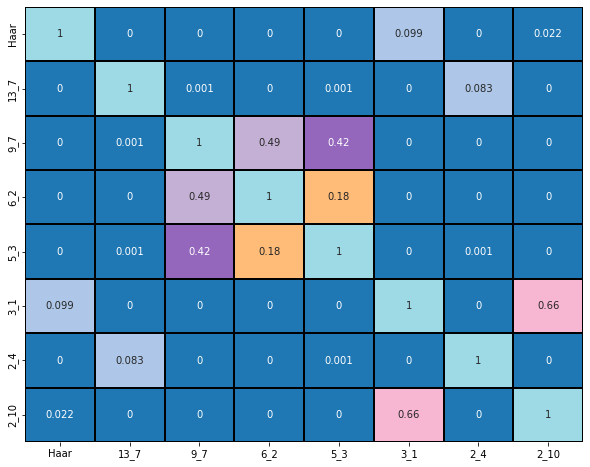

In [42]:
plt.figure(figsize=(10,8))
hm_pval = sns.heatmap(pvalues, annot=True,cmap="tab20",linecolor='black',linewidths=2,cbar=False,xticklabels=methodname,yticklabels=methodname)
plt.show()

In [43]:
decision

array([[ True, False, False, False, False,  True, False, False],
       [False,  True, False, False, False, False,  True, False],
       [False, False,  True,  True,  True, False, False, False],
       [False, False,  True,  True,  True, False, False, False],
       [False, False,  True,  True,  True, False, False, False],
       [ True, False, False, False, False,  True, False,  True],
       [False,  True, False, False, False, False,  True, False],
       [False, False, False, False, False,  True, False,  True]])

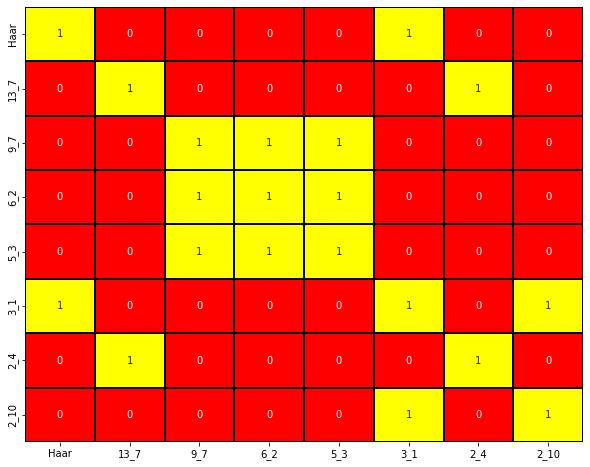

In [44]:
plt.figure(figsize=(10,8))
hm_pval = sns.heatmap(decision, annot=True,cmap="autumn",linecolor='black',linewidths=2,cbar=False,xticklabels=methodname,yticklabels=methodname)
plt.show()

# f) Wilcoxon Signed-Rank Test--(Non Parametric)

In [45]:
# perform mann whitney test for every pair of methods
pvalues=np.zeros((8,8),dtype='float32')
decision=np.zeros((8,8),dtype='bool')
alpha = 0.05
for i in range(8):
    for j in range(8):
        if i!=j:
            stat, p_value = stats.wilcoxon(df.values[:,i],df.values[:,j],alternative='two-sided') 
            pvalues[i,j]=round(p_value,3)
            if p_value < alpha:
                decision[i,j]=False
            else:
                decision[i,j]=True    
        

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [46]:
print(pvalues)

[[0.    0.    0.    0.    0.    0.075 0.    0.012]
 [0.    0.    0.027 0.    0.027 0.    0.002 0.   ]
 [0.    0.027 0.    0.519 0.285 0.    0.    0.   ]
 [0.    0.    0.519 0.    0.092 0.    0.    0.   ]
 [0.    0.027 0.285 0.11  0.    0.    0.027 0.   ]
 [0.075 0.    0.    0.    0.    0.    0.    0.373]
 [0.    0.002 0.    0.    0.027 0.    0.    0.   ]
 [0.009 0.    0.    0.    0.    0.373 0.    0.   ]]


In [47]:
print(decision)

[[False False False False False  True False False]
 [False False False False False False False False]
 [False False False  True  True False False False]
 [False False  True False  True False False False]
 [False False  True  True False False False False]
 [ True False False False False False False  True]
 [False False False False False False False False]
 [False False False False False  True False False]]


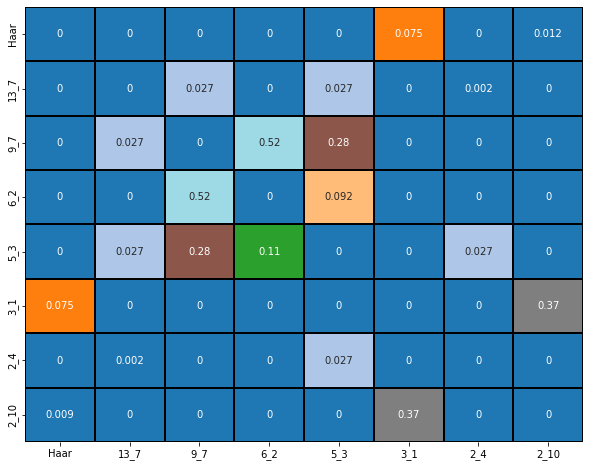

In [48]:
plt.figure(figsize=(10,8))
hm_pval = sns.heatmap(pvalues, annot=True,cmap="tab20",linecolor='black',linewidths=2,cbar=False,xticklabels=methodname,yticklabels=methodname)
plt.show()

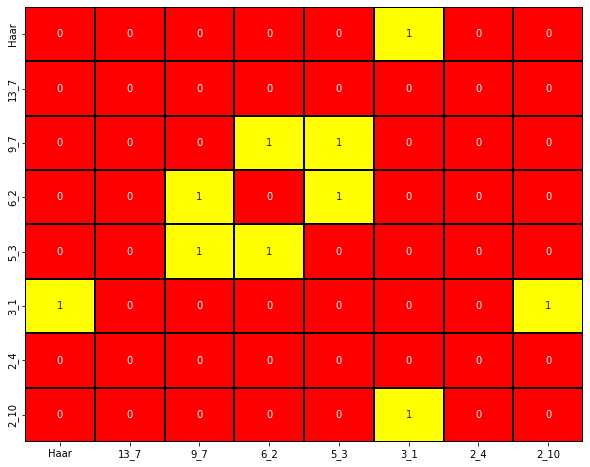

In [49]:
plt.figure(figsize=(10,8))
hm_pval = sns.heatmap(decision, annot=True,cmap="autumn",linecolor='black',linewidths=2,cbar=False,xticklabels=methodname,yticklabels=methodname)
plt.show()

# g) Unpaired t test

In [50]:
# perform mann whitney test for every pair of methods
pvalues=np.zeros((8,8),dtype='float32')
decision=np.zeros((8,8),dtype='bool')
alpha = 0.05
for i in range(8):
    for j in range(8):
        stat, p_value = stats.ttest_ind(df.values[:,i],df.values[:,j],alternative='two-sided') 
        pvalues[i,j]=round(p_value,3)
        if p_value < alpha:
            decision[i,j]=False
        else:
            decision[i,j]=True    

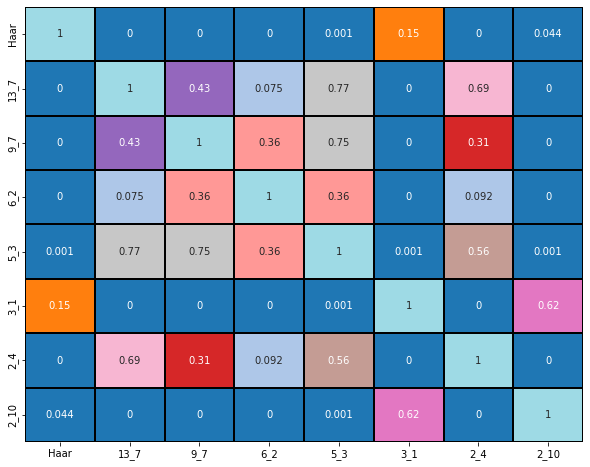

In [51]:
plt.figure(figsize=(10,8))
hm_pval = sns.heatmap(pvalues, annot=True,cmap="tab20",linecolor='black',linewidths=2,cbar=False,xticklabels=methodname,yticklabels=methodname)
plt.show()

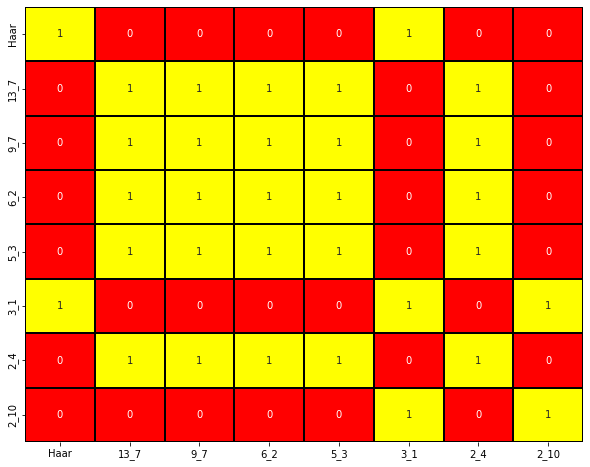

In [52]:
plt.figure(figsize=(10,8))
hm_pval = sns.heatmap(decision, annot=True,cmap="autumn",linecolor='black',linewidths=2,cbar=False,xticklabels=methodname,yticklabels=methodname)
plt.show()

# h) Kruskal-Wallis test 
is a non-parametric test and an alternative to One-Way Anova. By non-parametric we mean, the data is not assumed to become from a particular distribution. The main objective of this test is used to determine whether there is a statistical difference between the medians of at least three independent groups

In [54]:
result = stats.kruskal(df.values[:,0],df.values[:,1],df.values[:,2],df.values[:,3])

In [55]:
print(result)

KruskalResult(statistic=37.615526291972095, pvalue=3.409045321339093e-08)


# i) Anova among normal samples

In [56]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(wa_haar,wa_6_2,wa_5_3,wa_3_1,wa_2_10)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 16.552359731044827
p-value: 5.853662655380144e-09
